# <span style="color:#006600">PROJET 7: IMPLEMENTEZ UN MODELE DE SCORING</span>

## <span style="color:#006600">1- Compréhension de la probématique</span>

#### <span style="color:#39ac39">Contexte</span>

**Prêt à depenser** est une société financière qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt. La vision de cette entreprise est de mettre en oeuvre un outil de "**scoring crédit**" pour calculer la probabilité qu'un client rembourse son crédit, pui classifie la demande en crédit accordé ou refusé. A cet, l'idée est donc de développer un **algorithme de classification** en s'appuyant sur des données sources de données variées (données comportementales, données provenant d'autres institutions financières, etc). 

Toujours dans cette même vision, les chargés de relation client on fait remonter le fait que les clients sont de plus en plus demandeurs de transparence vis-à-vis des décision d'octroi de crédit. Cette demande de transparence des clients va tout à fait dans le sens des valeurs que l'entreprise veut encarner.

A cet problèmatique, il est alors question de développer un dashboard interactif pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décision d'aoctroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement.

#### <span style="color:#39ac39">Objectifs de la mission</span>

1- Construire un modèle de scoring qui donnera une prédiction sur la probalibilité de faillite d'un client de façon automatique
2- Construire un dashboard interactif à destination des gestionnaires de la relation client permettant d'interprèter les prédictions faites par le modèle, et d'améliorer la connaissance client des chargés de relation client.

Pour faciliter la préparation des données nécessaires à l'élaboration du modèle de scoring, il est demandé de sélectionner un kernet Kaggle. Ce kernet sera analysé et adapté pour s'aasurer qu'il répond aux bésoins de la mission.

#### <span style="color:#39ac39">Spécifications du dashaboard</span>

Il doit contenir au minimum les donctionnalités suivantes:

* Permettre de visualiser le score et l'interprètation de ce score pour chaque client de façon intelligible pour une personne non exdperte en data science

* Permettre de visualiser les informations descriptives relatives à un client (via un système de filtre)

* Permettre de comparer les informations descriptives relatives à un client à l'ensemble des clients ou à un groupe de clients similaires.

#### <span style="color:#39ac39">Livrables</span>

1- Le **dashboard** interactif répondant aux spécifications ci-dessus et l'API de prédiction du score, déployées chacunes sur le cloud

2- Le dossier sur un outil de versionning de code contenant:

* Le code de la modélisation d'entraînement (du prétraitement à la prédiction)
* Le code générant le dashboard
* Le code permettant de déployer le modèle sous forme d'API

3- Une **mote méthodologique** décrivant:

* La méthodologie d'entraînement du modèle (2 pages maximum)
* La fonction coût métier, l'algorithme d'optimisation et la métriqiue d'évaluation (1 page)
* L'interprétabilité globale et locale du modèle (1 page maximum)
* Les limites et les amélioration possibles (1 pages maximum)

4- Une **support de présentation** pour la soutenance, détaillant le travailréalisé

## <span style="color:#006600">2- Collecte des données</span>

### <span style="color:#39ac39">2-1 Importation des packages</span>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pickle
import os
import glob

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

import warnings
warnings.filterwarnings('ignore')

#Graphing…
plt.style.use('fivethirtyeight')
plt.rcParams.update(
    {
     'xtick.labelsize':15,
     'ytick.labelsize':15,
     'axes.labelsize': 15,
     'legend.fontsize': 15,
     'axes.titlesize':15,
     'axes.titleweight':'bold',
     'axes.titleweight':'bold'
    })

#font_title = {"family": "serif",
#              "weight": "bold",
#              "size": 25}

### <span style="color:#39ac39">2-2 Changement des données</span>

In [2]:
%%time 
application_train = pd.read_csv('dataSet_Projet_07/application_train.csv').sort_values("SK_ID_CURR")
application_test = pd.read_csv('dataSet_Projet_07/application_test.csv').sort_values("SK_ID_CURR")
bureau = pd.read_csv('dataSet_Projet_07/bureau.csv').sort_values(['SK_ID_CURR', 'SK_ID_BUREAU'])
bureau_balance = pd.read_csv('dataSet_Projet_07/bureau_balance.csv').sort_values("SK_ID_BUREAU")
credit_card_balance = pd.read_csv('dataSet_Projet_07/credit_card_balance.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV'])
installments_payments = pd.read_csv('dataSet_Projet_07/installments_payments.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV'])
POS_CASH_balance = pd.read_csv('dataSet_Projet_07/POS_CASH_balance.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV'])
previous_application = pd.read_csv('dataSet_Projet_07/previous_application.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV'])

Wall time: 2min 53s


In [3]:
print("DOCUMENTATION :")
pd.set_option("max_colwidth", 400)
description = pd.read_csv('Data_description/HomeCredit_columns_description.csv',  encoding="ISO-8859-1")
description

DOCUMENTATION :


,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


**application_{train|test}.csv**

Il s'agit du fichier de données principal, divisé en deux fichiers pour Train (avec TARGET) et Test (sans TARGET). Ce fichier de données comporte les données statistiques pour toutes les demandes. Une ligne représente un prêt dans l'échantillon de données.

**bureau.csv**

Tous les crédits antérieurs du client fournis par d'autres institutions financières qui ont été signalés au Bureau de crédit (pour les clients qui ont un prêt dans notre échantillon).

Pour chaque prêt de notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le Credit Bureau avant la date de la demande.

**bureau_balance.csv**

Soldes mensuels des crédits précédents dans le Credit Bureau.

Ce fichier de données comporte une ligne pour chaque mois de l'historique de chaque crédit précédent rapporté au Credit Bureau - c'est-à-dire que le fichier comporte (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois où nous avons un historique observable pour les crédits précédents) des lignes.

**POS_CASH_balance.csv**

Des instantanés des soldes mensuels des prêts POS (point of sales) et cash précédents que le demandeur a eus avec Home Credit.

Ce fichier comporte une ligne pour chaque mois de l'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau comporte (# de prêts dans l'échantillon * # de crédits précédents relatifs * # de mois dans lesquels nous avons un historique observable pour les crédits précédents) lignes.

**credit_card_balance.csv**

Des instantanés des soldes mensuels des cartes de crédit précédentes que le demandeur possède auprès de Home Credit.

Ce fichier comporte une ligne pour chaque mois de l'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau comporte (# de prêts dans l'échantillon * # de cartes de crédit précédentes relatives * # de mois où nous avons un historique observable pour la carte de crédit précédente) des lignes.

**previous_application.csv**

Toutes les demandes précédentes de prêts pour le crédit immobilier des clients qui ont des prêts dans notre échantillon.

Il existe une ligne pour chaque demande antérieure liée à des prêts dans notre échantillon de données.

**installments_payments.csv**

L'historique des remboursements pour les crédits précédemment déboursés dans Home Credit et liés aux prêts de notre échantillon. Il y a:
* une ligne pour chaque paiement effectué et 
* une ligne pour chaque paiement manqué.

Une ligne équivaut à un paiement d'un versement OU à un versement correspondant à un paiement d'un crédit immobilier précédent lié aux prêts de notre échantillon.

**HomeCredit_columns_description.csv**

Ce fichier contient les descriptions des colonnes des différents fichiers de données.

Affichons la description détaillée du contenu de chaque fichier de données. Pour ce fait, nous allons définir une fonction qui permettra de vérifier le nombre de lignes, de colonnes, des valeurs manquantes, des doublons, le comptage du type de colonnes dans chaque fichier de données téléchargés.

In [3]:
def description_data(dossier_data):
    '''Vérifiez le nombre de lignes, de colonnes, de valeurs manquantes et de doublons.
       Comptez le type de colonnes'''

    data_dict = {}
    for file in dossier_data:
        data = pd.read_csv(file)
        data_dict[file] = [data.shape[0], 
                           data.shape[1],
                            round(data.isna().sum().sum()/data.size*100, 2),
                            round(data.duplicated().sum().sum()/data.size*100, 2),
                            data.select_dtypes(include=['object']).shape[1],
                            data.select_dtypes(include=['float']).shape[1],
                            data.select_dtypes(include=['int']).shape[1],
                            data.select_dtypes(include=['bool']).shape[1]]

        comparative_data = pd.DataFrame.from_dict(data = data_dict, 
                                                   columns = ['Nbr ligne', 'Nbr colonne', '%NaN', '%Doublon', 
                                                              'object_dtype','float_dtype', 'int_dtype', 
                                                              'bool_dtype'], 
                                                   orient='index')
    print("FICHIERS DE RÉSUMÉ…")
    return(comparative_data)

In [4]:
description_data(dossier_data = glob.glob('./dataSet_Projet_07/*.csv'))

FICHIERS DE RÉSUMÉ…


,Nbr ligne,Nbr colonne,%NaN,%Doublon,object_dtype,float_dtype,int_dtype,bool_dtype
./dataSet_Projet_07\application_test.csv,48744,121,23.81,0.0,16,65,40,0
./dataSet_Projet_07\application_train.csv,307511,122,24.40,0.0,16,65,41,0
./dataSet_Projet_07\bureau.csv,1716428,17,13.50,0.0,3,8,6,0
./dataSet_Projet_07\bureau_balance.csv,27299925,3,0.00,0.0,1,0,2,0
./dataSet_Projet_07\credit_card_balance.csv,3840312,23,6.65,0.0,1,15,7,0
./dataSet_Projet_07\installments_payments.csv,13605401,8,0.01,0.0,0,5,3,0
./dataSet_Projet_07\POS_CASH_balance.csv,10001358,8,0.07,0.0,1,2,5,0
./dataSet_Projet_07\previous_application.csv,1670214,37,17.98,0.0,16,15,6,0
./dataSet_Projet_07\sample_submission.csv,48744,2,0.00,0.0,0,1,1,0


## <span style="color:#006600">3- Analyse exploratoire</span>

C'est analyse exploratoire permet d'illustrer globalement les données disponibles. Il est nécessaire d'approfondir l'analyse des features du ou des principaux fichiers de données.

#### <span style="color:#39ac39">3.1 application_{train|test}.csv</span>

In [5]:
print('Training Features shape: ', application_train.shape)
print('Testing Features shape: ', application_test.shape)

Training Features shape:  (307511, 122)
Testing Features shape:  (48744, 121)


#### >>>> variable à prédire "TARGET"

La variable dont on cherche à prédire est "TARGET". La variable prend soit la valeur 0 quand le prêt a été remboursé sans soucis, soit la valeur 1 quand il y a eu un défaut de payement.

In [6]:
# Table de fréquence de la variable cible ("TARGET")
application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

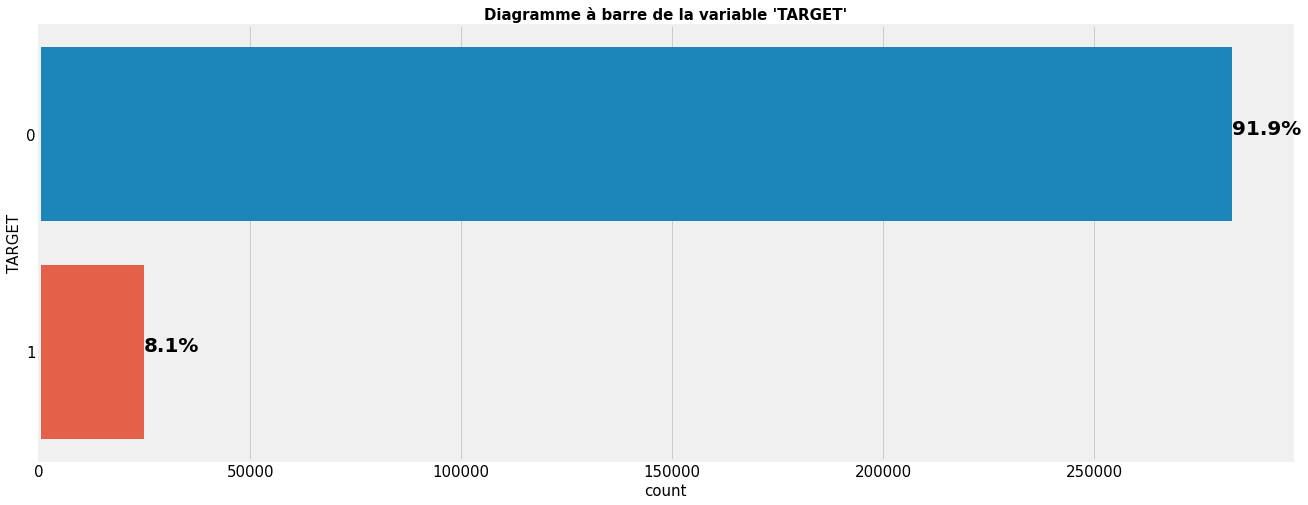

In [7]:
# Diagramme à barre de la variable 'TARGET'
ax, fig = plt.subplots(figsize=(20,8)) 
ax = sns.countplot(y='TARGET', data=application_train)
ax.set_title("Diagramme à barre de la variable 'TARGET'")

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/len(application_train.TARGET))
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')
        
plt.show()

Ce résultat montrent qu'il a un déséquilibre de classe très important dans les données. En effet, seulement environ 8,1% des clients ont un défaut de paiement contre 91,9% de rembousement sans soucis. Le déséquilibre de classe est souvent observé dans les données de crédit. La majorité des demandeurs de crédit sont incité à ne pas être en défaut de paiement car plus ils remboursent le crédit dans les délais, plus leurs côtes de crédit augment et donc ils peuvent à nouveau emprunter pour effectuer d'autres investissements.

Si le déséquilibre onservé ici est tout à fait normal, il n'en demeure pas moins que cela représente un grand défit de classification pour les algorithmes de ML.Une fois que nous entrons dans les modèles d'apprentissage automatique plus sophistiqués, nous pouvons pondérer les classes par leur représentation dans les données pour refléter ce déséquilibre.

### Types de colonnes

Analyse rapide du type de features, mais surtout établir un aperçu afin de pouvoir poser une réflexion sur l'encodage des données catégorielles.

In [8]:
#Number of each type of column
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [9]:
#Number of unique classes in each object column
application_train.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

La plupart des variables catégorielles ont un nombre relativement petit d'entrées uniques. Nous devrons trouver un moyen de traiter ces variables catégorielles…

### Valeurs manquantes

Plusieurs alternatives seront possibles pour gérer les données manquantes: remplacer les NaN, supprimer les colonnes avec un pourcentage élevé de valeurs manquantes (impossible de savoir à l'avance si ces colonnes seront utiles à notre modèle). Dans l'immédiat toutes les colonnes sont conservées…

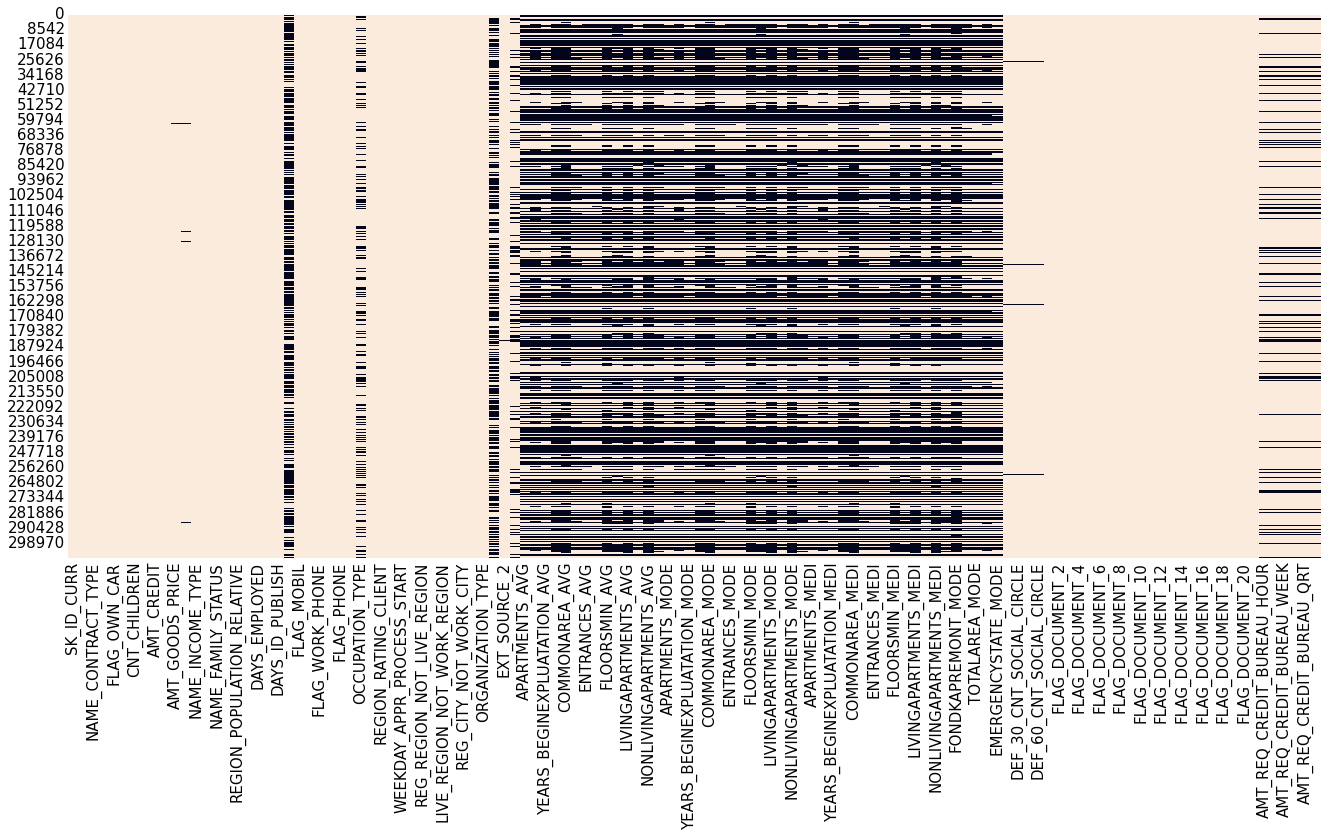

In [10]:
#Global view of the missing values (black)
plt.figure(figsize=(20,10))
sns.heatmap(application_train.notna(), cbar=False)
plt.show()

Une synthèse des données manquantes un peu confuse du fait du grand nombre de variables, mais il se dégage un premier constat qui montre que les NaN sont plus fortement présentent sur les caractéristiques des habitats (et non sur les crédits), comme l'atteste le TOP 10 ci-après…

In [11]:
def nan_check(data):
    '''Check Missing Values'''
    total = data.isnull().sum()
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (np.round(percent_1, 2))
    missing_data = pd.concat([total, percent_2], 
                             axis=1, keys=['Total', '%']).sort_values('%', ascending=False)
    return missing_data

print('TOP 10 Missing values from Training dataset')
nan_check(application_train)[:10]

TOP 10 Missing values from Training dataset


,Total,%
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
NONLIVINGAPARTMENTS_MEDI,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35


In [12]:
print("Nb of columns in the training sample: " + str(len(nan_check(application_train))))

print("Nb of columns in the training sample with missing values: " + 
      str(len(nan_check(application_train)[nan_check(application_train)['Total']!=0])))

Nb of columns in the training sample: 122
Nb of columns in the training sample with missing values: 67


### Outliers, valeurs atypiques, anormales

In [13]:
#Client's age in days at the time of application (def. from HomeCredit_columns_description.csv)
application_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

Les nombres de la colonne DAYS_BIRTH sont négatifs car ils sont enregistrés par rapport à la demande de prêt en cours. Il est nécessaire de modifier cette variable pour obtenir des chiffres plus compréhensibles pour l'analyse

In [14]:
(application_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

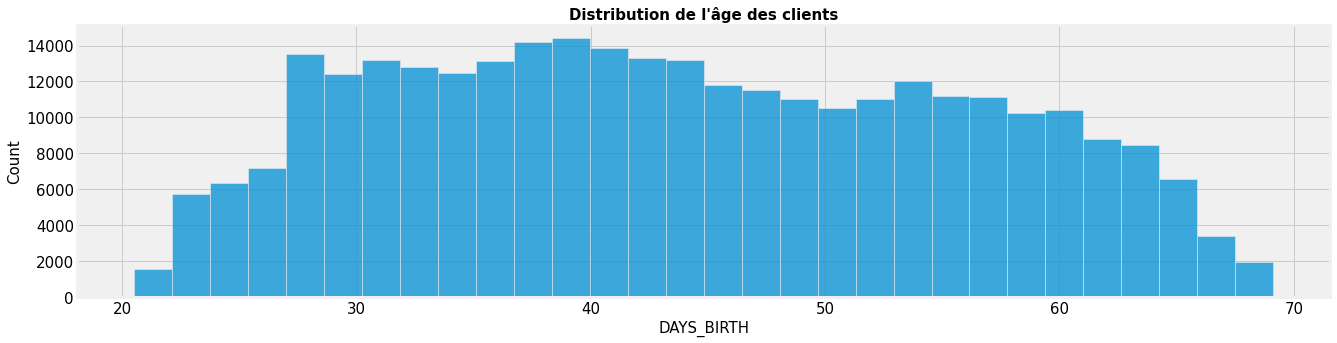

In [15]:
plt.figure(figsize=(20, 5))
sns.histplot((application_train['DAYS_BIRTH'] / -365), bins = 30).set_title("Distribution de l'âge des clients")
plt.show()

In [16]:
#How many days before the application the perso... (def. from HomeCredit_columns_description.csv)
application_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [17]:
application_test['DAYS_EMPLOYED'].describe()

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [18]:
print("%0.0f values with 365243 days employed for training data" % 
      len(application_train[application_train['DAYS_EMPLOYED'] == 365243]))
print("%0.0f Total values from days employed for training data" % application_train.shape[0])
print("***********************")
print("%0.0f values with 365243 days employed for testing data" % 
      len(application_test[application_test['DAYS_EMPLOYED'] == 365243]))
print("%0.0f Total values from days employed for testing data" % application_test.shape[0])

55374 values with 365243 days employed for training data
307511 Total values from days employed for training data
***********************
9274 values with 365243 days employed for testing data
48744 Total values from days employed for testing data


In [19]:
#Replace outliers values with nan
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
application_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

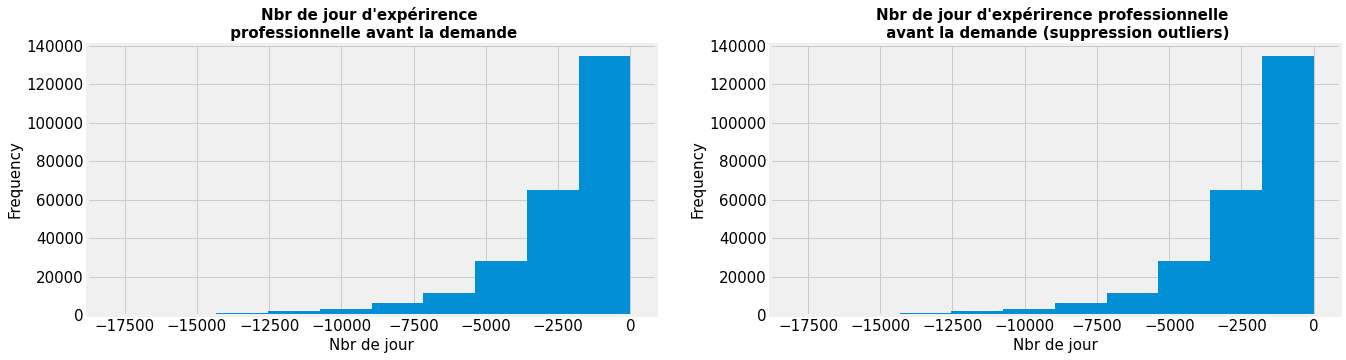

In [20]:
plt.subplot(1,2,1)
application_train['DAYS_EMPLOYED'].plot.hist(title = "Nbr de jour d'expérirence \n professionnelle avant la demande", figsize=(20,5));
plt.xlabel('Nbr de jour')

plt.subplot(1,2,2)
application_train['DAYS_EMPLOYED'].plot.hist(title ="Nbr de jour d'expérirence professionnelle \n avant la demande (suppression outliers)", figsize=(20,5))
plt.xlabel('Nbr de jour')
plt.show()

Idem ces données ne sont pas "normales" au sens où le Max. représente 1000 années (365243/365j). Est-ce un individu isolé? Plusieurs individus de l'échantillon?

### Fonctions pour faciliter l'analyse des principales variables…

In [21]:
def plot_stat(data, feature, title) : 
    
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.countplot(y=feature, data=data, order=data[feature].value_counts(ascending=False).index)
    ax.set_title(title)

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width()/len(data[feature]))
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    plt.show()
    

def plot_percent_target1(data, feature, title) : 
    
    cat_perc = data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.barplot(y=feature, x='TARGET', data=cat_perc)
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("Percent of target with value 1")

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width())
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    plt.show()

### Corrélations

L'analyse peut continuer par une étape de traitement des corrélations entre les caractéristiques et la Target. L'idée est de calculer le coefficient de corrélation de Pearson entre chaque variable et la Target. Cette étape permet d'avoir un aperçu des relations possibles entre les variables.

In [22]:
#Display correlations
print('Most Positive Correlations:\n', application_train.corr()['TARGET'].sort_values().tail(15))
print("--------------------------")
print('Most Negative Correlations:\n', application_train.corr()['TARGET'].sort_values().head(15))

Most Positive Correlations:
 DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
--------------------------
Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULA

Notons que la corrélation la plus forte est celle de la variable 'DAYS_BIRTH'. Ceci étant, pour faciliter la compréhension est retrouver la logique vue en préambule, les jours exprimés en valeurs négatives peuvent être traités en valeurs absolues. Alors le coef. de Person sera négatif, cela expose le fait qu'un client plus âgé sera moins susceptible de faire défaut au remboursement de son crédit (cela peut sembler logique, en tout cas ce n'est pas absurde).

In [23]:
#Find the correlation of the positive days since birth and target
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])
application_train['DAYS_BIRTH'].corr(application_train['TARGET'])

-0.07823930830982712

En termes de distribution des âges elle peut uniquement servir à visualiser la non présence d'outliers, suite à ce qui a été fait en amont sur les valeurs négatives de départ. Pour visualiser l'effet de l'âge sur la Target, nous pouvons faire un graphique (KDE) coloré par la valeur TARGET 0 et 1.

## <span style="color:#006600">4- Merging et agrégations des données</span>

Indispensable d'avoir une réflexion et une étape d'agrégation des données. Des informations complémentaires aux principaux fichiers peuvent en effet avoir un impact dans nos modélisations. Voyons comment traiter l'ensemble des jeux de données…

Merge les fichiers train / test

In [24]:
#Create a simple dataset with the train / test merge app
data = application_train.append(application_test)

Les deux jeux de données ont exactement le même format avec une seule différence, la TARGET dispo dans le train.

In [25]:
print('Train:' + str(application_train.shape))
print('Test:' + str(application_test.shape))
print('>>> Data:' + str(data.shape))

Train:(307511, 122)
Test:(48744, 121)
>>> Data:(356255, 122)


In [26]:
data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Merge fichiers bureau_balance & bureau

In [27]:
#Copy bureau_balance
buro_bal = bureau_balance.copy()

In [28]:
# Dimansion buro_bal
buro_bal.shape

(27299925, 3)

In [29]:
#Affichage des 5 première lignes
buro_bal.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
26079760,5001709,-7,C
26079756,5001709,-3,C
26079757,5001709,-4,C
26079758,5001709,-5,C
26079759,5001709,-6,C


In [30]:
# Transform to dummies
buro_bal = pd.concat(
    [buro_bal, pd.get_dummies(buro_bal["STATUS"], prefix = "BURO_BAL_STATUS")],
    axis = 1).drop("STATUS", axis = 1)

In [31]:
#Counting buros
buro_counts = buro_bal[["SK_ID_BUREAU", "MONTHS_BALANCE"]].groupby("SK_ID_BUREAU").count()
buro_bal["buro_count"] = buro_bal["SK_ID_BUREAU"].map(buro_bal["MONTHS_BALANCE"])

In [32]:
buro_counts.head(5)

,MONTHS_BALANCE
SK_ID_BUREAU,
5001709,97
5001710,83
5001711,4
5001712,19
5001713,22


In [33]:
buro_bal.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE,BURO_BAL_STATUS_0,BURO_BAL_STATUS_1,BURO_BAL_STATUS_2,BURO_BAL_STATUS_3,BURO_BAL_STATUS_4,BURO_BAL_STATUS_5,BURO_BAL_STATUS_C,BURO_BAL_STATUS_X,buro_count
26079760,5001709,-7,0,0,0,0,0,0,1,0,-5
26079756,5001709,-3,0,0,0,0,0,0,1,0,-5
26079757,5001709,-4,0,0,0,0,0,0,1,0,-5
26079758,5001709,-5,0,0,0,0,0,0,1,0,-5
26079759,5001709,-6,0,0,0,0,0,0,1,0,-5


In [34]:
# averaging buro bal
avg_buro_bal = buro_bal.groupby("SK_ID_BUREAU", as_index=False).mean()
avg_buro_bal.columns = ["AVG_BURO_" + f_ for f_ in avg_buro_bal.columns]
avg_buro_bal = avg_buro_bal.rename(columns={"AVG_BURO_MONTHS_BALANCE": "AVG_BURO_MONTHS_BALANCE_MEAN"})
avg_buro_bal = avg_buro_bal.rename(columns={"AVG_BURO_SK_ID_BUREAU": "SK_ID_BUREAU"})
print(avg_buro_bal.shape)
avg_buro_bal.head(5)

(817395, 11)


,SK_ID_BUREAU,AVG_BURO_MONTHS_BALANCE_MEAN,AVG_BURO_BURO_BAL_STATUS_0,AVG_BURO_BURO_BAL_STATUS_1,AVG_BURO_BURO_BAL_STATUS_2,AVG_BURO_BURO_BAL_STATUS_3,AVG_BURO_BURO_BAL_STATUS_4,AVG_BURO_BURO_BAL_STATUS_5,AVG_BURO_BURO_BAL_STATUS_C,AVG_BURO_BURO_BAL_STATUS_X,AVG_BURO_buro_count
0,5001709,-48.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.886598,0.113402,-5.0
1,5001710,-41.0,0.060241,0.0,0.0,0.0,0.0,0.0,0.578313,0.361446,-6.0
2,5001711,-1.5,0.750000,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,-7.0
3,5001712,-9.0,0.526316,0.0,0.0,0.0,0.0,0.0,0.473684,0.000000,-8.0
4,5001713,-10.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,-9.0


In [35]:
#Copy bureau
buro = bureau.copy()
print(buro.shape)
buro.head(5)

(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
248484,100001,5896630,Closed,currency 1,-857,0,-492.0,-553.0,NaN,0,112500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248485,100001,5896631,Closed,currency 1,-909,0,-179.0,-877.0,NaN,0,279720.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248486,100001,5896632,Closed,currency 1,-879,0,-514.0,-544.0,NaN,0,91620.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248487,100001,5896633,Closed,currency 1,-1572,0,-1329.0,-1328.0,NaN,0,85500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248488,100001,5896634,Active,currency 1,-559,0,902.0,NaN,NaN,0,337680.0,113166.0,0.0,0.0,Consumer credit,-6,4630.5


In [36]:
bureau_merg = buro.merge(avg_buro_bal, on='SK_ID_BUREAU', how='left')
bureau_merg.drop('SK_ID_BUREAU', axis=1, inplace=True)
display(bureau_merg.head())
display(bureau_merg.shape)

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,AVG_BURO_MONTHS_BALANCE_MEAN,AVG_BURO_BURO_BAL_STATUS_0,AVG_BURO_BURO_BAL_STATUS_1,AVG_BURO_BURO_BAL_STATUS_2,AVG_BURO_BURO_BAL_STATUS_3,AVG_BURO_BURO_BAL_STATUS_4,AVG_BURO_BURO_BAL_STATUS_5,AVG_BURO_BURO_BAL_STATUS_C,AVG_BURO_BURO_BAL_STATUS_X,AVG_BURO_buro_count
0,100001,Closed,currency 1,-857,0,-492.0,-553.0,NaN,0,112500.0,0.0,0.0,0.0,Consumer credit,-155,0.0,-14.0,0.103448,0.000000,0.0,0.0,0.0,0.0,0.655172,0.241379,-11.0
1,100001,Closed,currency 1,-909,0,-179.0,-877.0,NaN,0,279720.0,0.0,0.0,0.0,Consumer credit,-155,0.0,-14.5,0.033333,0.000000,0.0,0.0,0.0,0.0,0.966667,0.000000,-12.0
2,100001,Closed,currency 1,-879,0,-514.0,-544.0,NaN,0,91620.0,0.0,0.0,0.0,Consumer credit,-155,0.0,-14.0,0.068966,0.000000,0.0,0.0,0.0,0.0,0.620690,0.310345,-13.0
3,100001,Closed,currency 1,-1572,0,-1329.0,-1328.0,NaN,0,85500.0,0.0,0.0,0.0,Consumer credit,-155,0.0,-25.5,0.019231,0.000000,0.0,0.0,0.0,0.0,0.846154,0.134615,-14.0
4,100001,Active,currency 1,-559,0,902.0,NaN,NaN,0,337680.0,113166.0,0.0,0.0,Consumer credit,-6,4630.5,-9.0,0.631579,0.052632,0.0,0.0,0.0,0.0,0.000000,0.315789,-15.0


(1716428, 26)

In [37]:
#Number of unique classes in each object column
bureau_merg.select_dtypes('object').nunique()

CREDIT_ACTIVE       4
CREDIT_CURRENCY     4
CREDIT_TYPE        15
dtype: int64

In [38]:
# Go to dummies
bureau_CREDIT_ACTIVE_dum = pd.get_dummies(bureau_merg["CREDIT_ACTIVE"], prefix = "CA_")
bureau_CREDIT_CURRENCY_dum = pd.get_dummies(bureau_merg["CREDIT_CURRENCY"], prefix = "CU_")
bureau_CREDIT_TYPE_dum = pd.get_dummies(bureau_merg["CREDIT_TYPE"], prefix = "TY_")

bureau_full = pd.concat(
    [
        bureau_merg, bureau_CREDIT_ACTIVE_dum, bureau_CREDIT_CURRENCY_dum, bureau_CREDIT_TYPE_dum
        
    ], axis = 1).drop(["CREDIT_ACTIVE", "CREDIT_CURRENCY", "CREDIT_TYPE"], axis = 1)

display(bureau_full.head())
display(bureau_full.shape)

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,AVG_BURO_MONTHS_BALANCE_MEAN,AVG_BURO_BURO_BAL_STATUS_0,AVG_BURO_BURO_BAL_STATUS_1,AVG_BURO_BURO_BAL_STATUS_2,AVG_BURO_BURO_BAL_STATUS_3,AVG_BURO_BURO_BAL_STATUS_4,AVG_BURO_BURO_BAL_STATUS_5,AVG_BURO_BURO_BAL_STATUS_C,AVG_BURO_BURO_BAL_STATUS_X,AVG_BURO_buro_count,CA__Active,CA__Bad debt,CA__Closed,CA__Sold,CU__currency 1,CU__currency 2,CU__currency 3,CU__currency 4,TY__Another type of loan,TY__Car loan,TY__Cash loan (non-earmarked),TY__Consumer credit,TY__Credit card,TY__Interbank credit,TY__Loan for business development,TY__Loan for purchase of shares (margin lending),TY__Loan for the purchase of equipment,TY__Loan for working capital replenishment,TY__Microloan,TY__Mobile operator loan,TY__Mortgage,TY__Real estate loan,TY__Unknown type of loan
0,100001,-857,0,-492.0,-553.0,NaN,0,112500.0,0.0,0.0,0.0,-155,0.0,-14.0,0.103448,0.000000,0.0,0.0,0.0,0.0,0.655172,0.241379,-11.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,100001,-909,0,-179.0,-877.0,NaN,0,279720.0,0.0,0.0,0.0,-155,0.0,-14.5,0.033333,0.000000,0.0,0.0,0.0,0.0,0.966667,0.000000,-12.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,100001,-879,0,-514.0,-544.0,NaN,0,91620.0,0.0,0.0,0.0,-155,0.0,-14.0,0.068966,0.000000,0.0,0.0,0.0,0.0,0.620690,0.310345,-13.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,100001,-1572,0,-1329.0,-1328.0,NaN,0,85500.0,0.0,0.0,0.0,-155,0.0,-25.5,0.019231,0.000000,0.0,0.0,0.0,0.0,0.846154,0.134615,-14.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,100001,-559,0,902.0,NaN,NaN,0,337680.0,113166.0,0.0,0.0,-6,4630.5,-9.0,0.631579,0.052632,0.0,0.0,0.0,0.0,0.000000,0.315789,-15.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


(1716428, 46)

In [39]:
bureau_mean = bureau_full.groupby('SK_ID_CURR', as_index=False).mean()
display(bureau_mean.head())
display(bureau_mean.shape)

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,AVG_BURO_MONTHS_BALANCE_MEAN,AVG_BURO_BURO_BAL_STATUS_0,AVG_BURO_BURO_BAL_STATUS_1,AVG_BURO_BURO_BAL_STATUS_2,AVG_BURO_BURO_BAL_STATUS_3,AVG_BURO_BURO_BAL_STATUS_4,AVG_BURO_BURO_BAL_STATUS_5,AVG_BURO_BURO_BAL_STATUS_C,AVG_BURO_BURO_BAL_STATUS_X,AVG_BURO_buro_count,CA__Active,CA__Bad debt,CA__Closed,CA__Sold,CU__currency 1,CU__currency 2,CU__currency 3,CU__currency 4,TY__Another type of loan,TY__Car loan,TY__Cash loan (non-earmarked),TY__Consumer credit,TY__Credit card,TY__Interbank credit,TY__Loan for business development,TY__Loan for purchase of shares (margin lending),TY__Loan for the purchase of equipment,TY__Loan for working capital replenishment,TY__Microloan,TY__Mobile operator loan,TY__Mortgage,TY__Real estate loan,TY__Unknown type of loan
0,100001,-735.000000,0.0,82.428571,-825.500000,NaN,0.0,207623.571429,85240.928571,0.00000,0.0,-93.142857,3545.357143,-11.785714,0.336651,0.007519,0.0,0.0,0.0,0.0,0.441240,0.214590,-14.000,0.428571,0.0,0.571429,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100002,-874.000000,0.0,-349.000000,-697.500000,1681.029,0.0,108131.945625,49156.200000,7997.14125,0.0,-499.875000,0.000000,-21.875000,0.406960,0.255682,0.0,0.0,0.0,0.0,0.175426,0.161932,-3.625,0.250000,0.0,0.750000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100003,-1400.750000,0.0,-544.500000,-1097.333333,0.000,0.0,254350.125000,0.000000,202500.00000,0.0,-816.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,0.0,0.750000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100004,-867.000000,0.0,-488.500000,-532.500000,0.000,0.0,94518.900000,0.000000,0.00000,0.0,-532.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100005,-190.666667,0.0,439.333333,-123.000000,0.000,0.0,219042.000000,189469.500000,0.00000,0.0,-54.333333,1420.500000,-3.000000,0.735043,0.000000,0.0,0.0,0.0,0.0,0.128205,0.136752,-41.000,0.666667,0.0,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(305811, 46)

In [40]:
#Merge all this features with our data sample
data = data.merge(bureau_mean, on='SK_ID_CURR', how='left')
display(data.head())
display(data.shape)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y,AVG_BURO_MONTHS_BALANCE_MEAN,AVG_BURO_BURO_BAL_STATUS_0,AVG_BURO_BURO_BAL_STATUS_1,AVG_BURO_BURO_BAL_STATUS_2,AVG_BURO_BURO_BAL_STATUS_3,AVG_BURO_BURO_BAL_STATUS_4,AVG_BURO_BURO_BAL_STATUS_5,AVG_BURO_BURO_BAL_STATUS_C,AVG_BURO_BURO_BAL_STATUS_X,AVG_BURO_buro_count,CA__Active,CA__Bad debt,CA__Closed,CA__Sold,CU__currency 1,CU__currency 2,CU__currency 3,CU__currency 4,TY__Another type of loan,TY__Car loan,TY__Cash loan (non-earmarked),TY__Consumer credit,TY__Credit card,TY__Interbank credit,TY__Loan for business development,TY__Loan for purchase of shares (margin lending),TY__Loan for the purchase of equipment,TY__Loan for working capital replenishment,TY__Microloan,TY__Mobile operator loan,TY__Mortgage,TY__Real estate loan,TY__Unknown type of loan
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,-874.00,0.0,-349.0,-697.500000,1681.029,0.0,108131.945625,49156.2,7997.14125,0.0,-499.875

(356255, 167)

Fichier previous_application.csv

In [41]:
#Copy bureau
prev = previous_application.copy()
display(prev.head())
display(prev.shape)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
201668,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,Y,1,0.104326,NaN,NaN,XAP,Approved,-1740,Cash through the bank,XAP,Family,Refreshed,Mobile,POS,XNA,Country-wide,23,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0
892077,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1223745,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
1021650,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0


(1670214, 37)

In [42]:
#Number of unique classes in each object column
prev.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64

In [43]:
print("Categorical features with Binary encode (0 or 1; two categories)")
for bin_feature in ["FLAG_LAST_APPL_PER_CONTRACT"]:
    prev[bin_feature], uniques = pd.factorize(prev[bin_feature])

Categorical features with Binary encode (0 or 1; two categories)


In [44]:
# Go to dummies
prev_cat_feactures = [
    f_ for f_ in prev.columns if prev[f_].dtype == 'object'
]

prev_dum = pd.DataFrame()
for f_ in prev_cat_feactures:
    prev_dum = pd.concat(
    [prev_dum, pd.get_dummies(prev[f_], prefix = f_).astype(np.uint8)],
    axis = 1)

prev = pd.concat([prev, prev_dum], axis = 1).drop(list(prev.select_dtypes('object')), axis = 1)
display(prev.head())
display(prev.shape)

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,NAME_CASH_LOAN_PURPOSE_Building a house or an annex,NAME_CASH_LOAN_PURPOSE_Business development,NAME_CASH_LOAN_PURPOSE_Buying a garage,NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land,NAME_CASH_LOAN_PURPOSE_Buying a home,NAME_CASH_LOAN_PURPOSE_Buying a new car,NAME_CASH_LOAN_PURPOSE_Buying a used car,NAME_CASH_LOAN_PURPOSE_Car repairs,NAME_CASH_LOAN_PURPOSE_Education,NAME_CASH_LOAN_PURPOSE_Everyday expenses,NAME_CASH_LOAN_PURPOSE_Furniture,NAME_CASH_LOAN_PURPOSE_Gasification / water supply,NAME_CASH_LOAN_PURPOSE_Hobby,NAME_CASH_LOAN_PURPOSE_Journey,NAME_CASH_LOAN_PURPOSE_Medicine,NAME_CASH_LOAN_PURPOSE_Money for a third person,NAME_CASH_LOAN_PURPOSE_Other,NAME_CASH_LOAN_PURPOSE_Payments on other loans,NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment,NAME_CASH_LOAN_PURPOSE_Refusal to name the goal,NAME_CASH_LOAN_PURPOSE_Repairs,NAME_CASH_LOAN_PURPOSE_Urgent needs,NAME_CASH_LOAN_PURPOSE_Wedding / gift / holiday,NAME_CASH_LOAN_PURPOSE_XAP,NAME_CASH_LOAN_PURPOSE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,NAME_PAYMENT_TYPE_Cash through the bank,NAME_PAYMENT_TYPE_Cashless from the account of the employer,NAME_PAYMENT_TYPE_Non-cash from your account,NAME_PAYMENT_TYPE_XNA,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_CLIENT_TYPE_New,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_CLIENT_TYPE_XNA,NAME_GOODS_CATEGORY_Additional Service,NAME_GOODS_CATEGORY_Animals,NAME_GOODS_CATEGORY_Audio/Video,NAME_GOODS_CATEGORY_Auto Accessories,NAME_GOODS_CATEGORY_Clothing and Accessories,NAME_GOODS_CATEGORY_Computers,NAME_GOODS_CATEGORY_Construction Materials,NAME_GOODS_CATEGORY_Consumer Electronics,NAME_GOODS_CATEGORY_Direct Sales,NAME_GOODS_CATEGORY_Education,NAME_GOODS_CATEGORY_Fitness,NAME_GOODS_CATEGORY_Furniture,NAME_GOODS_CATEGORY_Gardening,NAME_GOODS_CATEGORY_Homewares,NAME_GOODS_CATEGORY_House Construction,NAME_GOODS_CATEGORY_Insurance,NAME_GOODS_CATEGORY_Jewelry,NAME_GOODS_CATEGORY_Medical Supplies,NAME_GOODS_CATEGORY_Medicine,NAME_GOODS_CATEGORY_Mobile,NAME_GOODS_CATEGORY_Office Appliances,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_Photo / Cinema Equipment,NAME_GOODS_CATEGORY_Sport and Leisure,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Vehicles,NAME_GOODS_CATEGORY_Weapon,NAME_GOODS_CATEGORY_XNA,NAME_PORTFOLIO_Cards,NAME_PORTFOLIO_Cars,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_PRODUCT_TYPE_XNA,NAME_PRODUCT_TYPE_walk-in,NAME_PRODUCT_TYPE_x-sell,CHANNEL_TYPE_AP+ (Cash loan),CHANNEL_TYPE_Car dealer,CHANNEL_TYPE_Channel of corporate sales,CHANNEL_TYPE_Contact center,CHANNEL_TYPE_Country-wide,CHANNEL_TYPE_Credit and cash offices,CHANNEL_TYPE_Regional / Local,CHANNEL_TYPE_Stone,NAME_SELLER_INDUSTRY_Auto technology,NAME_SELLER_INDUSTRY_Clothing,NAME_SELLER_INDUSTRY_Connectivity,NAME_SELLER_INDUSTRY_Constru

(1670214, 163)

In [45]:
# Days 365.243 values -> nan
prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

In [46]:
#Number of previous applications of the clients to Home Credit
nb_prev_per_curr = prev[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
prev["SK_ID_PREV"] = prev['SK_ID_CURR'].map(nb_prev_per_curr["SK_ID_PREV"])
avg_prev = prev.groupby("SK_ID_CURR", as_index=False).mean()
avg_prev = avg_prev.rename(columns={"SK_ID_PREV": "PREVIOUS_APPLICATION_COUNT"})
avg_prev.columns = ["AVG_PREV_" + f_ for f_ in avg_prev.columns]
avg_prev = avg_prev.rename(columns={"AVG_PREV_SK_ID_CURR": "SK_ID_CURR"})
display(avg_prev.head())
display(avg_prev.shape)

,SK_ID_CURR,AVG_PREV_PREVIOUS_APPLICATION_COUNT,AVG_PREV_AMT_ANNUITY,AVG_PREV_AMT_APPLICATION,AVG_PREV_AMT_CREDIT,AVG_PREV_AMT_DOWN_PAYMENT,AVG_PREV_AMT_GOODS_PRICE,AVG_PREV_HOUR_APPR_PROCESS_START,AVG_PREV_FLAG_LAST_APPL_PER_CONTRACT,AVG_PREV_NFLAG_LAST_APPL_IN_DAY,AVG_PREV_RATE_DOWN_PAYMENT,AVG_PREV_RATE_INTEREST_PRIMARY,AVG_PREV_RATE_INTEREST_PRIVILEGED,AVG_PREV_DAYS_DECISION,AVG_PREV_SELLERPLACE_AREA,AVG_PREV_CNT_PAYMENT,AVG_PREV_DAYS_FIRST_DRAWING,AVG_PREV_DAYS_FIRST_DUE,AVG_PREV_DAYS_LAST_DUE_1ST_VERSION,AVG_PREV_DAYS_LAST_DUE,AVG_PREV_DAYS_TERMINATION,AVG_PREV_NFLAG_INSURED_ON_APPROVAL,AVG_PREV_NAME_CONTRACT_TYPE_Cash loans,AVG_PREV_NAME_CONTRACT_TYPE_Consumer loans,AVG_PREV_NAME_CONTRACT_TYPE_Revolving loans,AVG_PREV_NAME_CONTRACT_TYPE_XNA,AVG_PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY,AVG_PREV_WEEKDAY_APPR_PROCESS_START_MONDAY,AVG_PREV_WEEKDAY_APPR_PROCESS_START_SATURDAY,AVG_PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY,AVG_PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY,AVG_PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY,AVG_PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Building a house or an annex,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Business development,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Buying a garage,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Buying a home,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Buying a new car,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Buying a used car,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Car repairs,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Education,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Everyday expenses,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Furniture,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Gasification / water supply,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Hobby,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Journey,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Medicine,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Money for a third person,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Other,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Payments on other loans,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Repairs,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Urgent needs,AVG_PREV_NAME_CASH_LOAN_PURPOSE_Wedding / gift / holiday,AVG_PREV_NAME_CASH_LOAN_PURPOSE_XAP,AVG_PREV_NAME_CASH_LOAN_PURPOSE_XNA,AVG_PREV_NAME_CONTRACT_STATUS_Approved,AVG_PREV_NAME_CONTRACT_STATUS_Canceled,AVG_PREV_NAME_CONTRACT_STATUS_Refused,AVG_PREV_NAME_CONTRACT_STATUS_Unused offer,AVG_PREV_NAME_PAYMENT_TYPE_Cash through the bank,AVG_PREV_NAME_PAYMENT_TYPE_Cashless from the account of the employer,AVG_PREV_NAME_PAYMENT_TYPE_Non-cash from your account,AVG_PREV_NAME_PAYMENT_TYPE_XNA,AVG_PREV_CODE_REJECT_REASON_CLIENT,AVG_PREV_CODE_REJECT_REASON_HC,AVG_PREV_CODE_REJECT_REASON_LIMIT,AVG_PREV_CODE_REJECT_REASON_SCO,AVG_PREV_CODE_REJECT_REASON_SCOFR,AVG_PREV_CODE_REJECT_REASON_SYSTEM,AVG_PREV_CODE_REJECT_REASON_VERIF,AVG_PREV_CODE_REJECT_REASON_XAP,AVG_PREV_CODE_REJECT_REASON_XNA,AVG_PREV_NAME_TYPE_SUITE_Children,AVG_PREV_NAME_TYPE_SUITE_Family,AVG_PREV_NAME_TYPE_SUITE_Group of people,AVG_PREV_NAME_TYPE_SUITE_Other_A,AVG_PREV_NAME_TYPE_SUITE_Other_B,"AVG_PREV_NAME_TYPE_SUITE_Spouse, partner",AVG_PREV_NAME_TYPE_SUITE_Unaccompanied,AVG_PREV_NAME_CLIENT_TYPE_New,AVG_PREV_NAME_CLIENT_TYPE_Refreshed,AVG_PREV_NAME_CLIENT_TYPE_Repeater,AVG_PREV_NAME_CLIENT_TYPE_XNA,AVG_PREV_NAME_GOODS_CATEGORY_Additional Service,AVG_PREV_NAME_GOODS_CATEGORY_Animals,AVG_PREV_NAME_GOODS_CATEGORY_Audio/Video,AVG_PREV_NAME_GOODS_CATEGORY_Auto Accessories,AVG_PREV_NAME_GOODS_CATEGORY_Clothing and Accessories,AVG_PREV_NAME_GOODS_CATEGORY_Computers,AVG_PREV_NAME_GOODS_CATEGORY_Construction Materials,AVG_PREV_NAME_GOODS_CATEGORY_Consumer Electronics,AVG_PREV_NAME_GOODS_CATEGORY_Direct Sales,AVG_PREV_NAME_GOODS_CATEGORY_Education,AVG_PREV_NAME_GOODS_CATEGORY_Fitness,AVG_PREV_NAME_GOODS_CATEGORY_Furniture,AVG_PREV_NAME_GOODS_CATEGORY_Gardening,AVG_PREV_NAME_GOODS_CATEGORY_Homewares,AVG_PREV_NAME_GOODS_CATEGORY_House Construction,AVG_PREV_NAME_GOODS_CATE

(338857, 163)

In [47]:
#Merge this new column in our data sample
data = data.merge(avg_prev, on='SK_ID_CURR', how='left')
display(data.head())
display(data.shape)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y,AVG_BURO_MONTHS_BALANCE_MEAN,AVG_BURO_BURO_BAL_STATUS_0,AVG_BURO_BURO_BAL_STATUS_1,AVG_BURO_BURO_BAL_STATUS_2,AVG_BURO_BURO_BAL_STATUS_3,AVG_BURO_BURO_BAL_STATUS_4,AVG_BURO_BURO_BAL_STATUS_5,AVG_BURO_BURO_BAL_STATUS_C,AVG_BURO_BURO_BAL_STATUS_X,AVG_BURO_buro_count,CA__Active,CA__Bad debt,CA__Closed,CA__Sold,CU__currency 1,CU__currency 2,CU__currency 3,CU__currency 4,TY__Another type of loan,TY__Car loan,TY__Cash loan (non-earmarked),TY__Consumer credit,TY__Credit card,TY__Interbank credit,TY__Loan for business development,TY__Loan for purchase of shares (margin lending),TY__Loan for the purchase of equipment,TY__Loan for working capital replenishment,TY__Microloan,TY__Mobile operator loan,TY__Mortgage,TY__Real estate loan,TY__Unknown type of loan,AVG_PREV_PREVIOUS_APPLICATION_COUNT,AVG_PREV_AMT_ANNUITY,AVG_PREV_AMT_APPLICATION,AVG_PREV_AMT_CREDIT,AVG_PREV_AMT_DOWN_PAYMENT,AVG_PREV_AMT_GOODS_PRICE,AVG_PREV_HOUR_APPR_PROCESS_START,AVG_PREV_FLAG_LAST_APPL_PER_CONTRACT,AVG_PREV_NFLAG_LAST_APPL_IN_DAY,AVG_PREV_RATE_DOWN_PAYMENT,AVG_PREV_RATE_INTEREST_PRIMARY,AVG_PREV_RATE_INTEREST_PRIVILEGED,AVG_PREV_DAYS_DECISION,AVG_PREV_SELLERPLACE_AREA,AVG_PREV_CNT_PAYMENT,AVG_PREV_DAYS_FIRST_DRAWING,AVG_PREV_DAYS_FIRST_DUE,AVG_PREV_DAYS_LAST_DUE_1ST_VERSION,AVG_PREV_DAYS_LAST_DUE,AVG_PREV_DAYS_TERMINATION,AVG_PREV_NFLAG_INSURED_ON_APPROVAL,AVG_PREV_NAME_CONTRACT_TYPE_Cash loans,AVG_PREV_NAME_CONTRACT_TYPE_Consumer loans,AVG_PREV_NAME_CONTRACT_TYPE_Revolving loans,AVG_PREV_NAME_CONTRACT_TYPE_XNA,AVG_PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY,AVG_PREV_WEEKDAY_APPR_PROCE

(356255, 329)

Fichier credit_card_balance.csv

In [48]:
cc_bal = credit_card_balance.copy()
display(cc_bal.head())
display(cc_bal.shape)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
520387,1489396,100006,-2,0.0,270000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
584804,1489396,100006,-1,0.0,270000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
655566,1489396,100006,-5,0.0,270000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
1347528,1489396,100006,-3,0.0,270000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
1399895,1489396,100006,-4,0.0,270000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0


(3840312, 23)

In [49]:
#Number of unique classes in each object column
cc_bal.select_dtypes('object').nunique()

NAME_CONTRACT_STATUS    7
dtype: int64

In [50]:
# Go to dummies
cc_bal = pd.concat(
    [
       cc_bal, pd.get_dummies(
           cc_bal["NAME_CONTRACT_STATUS"], prefix = "NAME_CONTRACT_STATUS_")
    ], axis = 1).drop(["NAME_CONTRACT_STATUS"], axis = 1)

In [51]:
cc_bal.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS__Active,NAME_CONTRACT_STATUS__Approved,NAME_CONTRACT_STATUS__Completed,NAME_CONTRACT_STATUS__Demand,NAME_CONTRACT_STATUS__Refused,NAME_CONTRACT_STATUS__Sent proposal,NAME_CONTRACT_STATUS__Signed
520387,1489396,100006,-2,0.0,270000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,0,0,1,0,0,0,0,0,0
584804,1489396,100006,-1,0.0,270000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,0,0,1,0,0,0,0,0,0
655566,1489396,100006,-5,0.0,270000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,0,0,1,0,0,0,0,0,0
1347528,1489396,100006,-3,0.0,270000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,0,0,1,0,0,0,0,0,0
1399895,1489396,100006,-4,0.0,270000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,0,0,1,0,0,0,0,0,0


In [52]:
nb_prevs = cc_bal[["SK_ID_CURR", "SK_ID_PREV"]].groupby("SK_ID_CURR").count()
cc_bal["SK_ID_PREV"] = cc_bal["SK_ID_CURR"].map(nb_prevs["SK_ID_PREV"])

avg_cc_bal = cc_bal.groupby("SK_ID_CURR", as_index=False).mean()
avg_cc_bal.columns = ["CC_BAL_" + f_ for f_ in avg_cc_bal.columns]
avg_cc_bal = avg_cc_bal.rename(columns={"CC_BAL_SK_ID_CURR": "SK_ID_CURR"})
display(avg_cc_bal.head())
display(avg_cc_bal.shape)

,SK_ID_CURR,CC_BAL_SK_ID_PREV,CC_BAL_MONTHS_BALANCE,CC_BAL_AMT_BALANCE,CC_BAL_AMT_CREDIT_LIMIT_ACTUAL,CC_BAL_AMT_DRAWINGS_ATM_CURRENT,CC_BAL_AMT_DRAWINGS_CURRENT,CC_BAL_AMT_DRAWINGS_OTHER_CURRENT,CC_BAL_AMT_DRAWINGS_POS_CURRENT,CC_BAL_AMT_INST_MIN_REGULARITY,CC_BAL_AMT_PAYMENT_CURRENT,CC_BAL_AMT_PAYMENT_TOTAL_CURRENT,CC_BAL_AMT_RECEIVABLE_PRINCIPAL,CC_BAL_AMT_RECIVABLE,CC_BAL_AMT_TOTAL_RECEIVABLE,CC_BAL_CNT_DRAWINGS_ATM_CURRENT,CC_BAL_CNT_DRAWINGS_CURRENT,CC_BAL_CNT_DRAWINGS_OTHER_CURRENT,CC_BAL_CNT_DRAWINGS_POS_CURRENT,CC_BAL_CNT_INSTALMENT_MATURE_CUM,CC_BAL_SK_DPD,CC_BAL_SK_DPD_DEF,CC_BAL_NAME_CONTRACT_STATUS__Active,CC_BAL_NAME_CONTRACT_STATUS__Approved,CC_BAL_NAME_CONTRACT_STATUS__Completed,CC_BAL_NAME_CONTRACT_STATUS__Demand,CC_BAL_NAME_CONTRACT_STATUS__Refused,CC_BAL_NAME_CONTRACT_STATUS__Sent proposal,CC_BAL_NAME_CONTRACT_STATUS__Signed
0,100006,6.0,-3.5,0.000000,270000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,100011,74.0,-38.5,54482.111149,164189.189189,2432.432432,2432.432432,0.0,0.0,3956.221849,4843.064189,4520.067568,52402.088919,54433.179122,54433.179122,0.054054,0.054054,0.0,0.0,25.767123,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,100013,96.0,-48.5,18159.919219,131718.750000,6350.000000,5953.125000,0.0,0.0,1454.539551,7168.346250,6817.172344,17255.559844,18101.079844,18101.079844,0.255556,0.239583,0.0,0.0,18.719101,0.010417,0.010417,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,100021,17.0,-10.0,0.000000,675000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.411765,0.0,0.588235,0.0,0.0,0.0,0.0
4,100023,8.0,-7.5,0.000000,135000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0


(103558, 29)

In [53]:
#Merge this new column in our data sample
data = data.merge(avg_cc_bal, on='SK_ID_CURR', how='left')
display(data.head())
display(data.shape)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y,AVG_BURO_MONTHS_BALANCE_MEAN,AVG_BURO_BURO_BAL_STATUS_0,AVG_BURO_BURO_BAL_STATUS_1,AVG_BURO_BURO_BAL_STATUS_2,AVG_BURO_BURO_BAL_STATUS_3,AVG_BURO_BURO_BAL_STATUS_4,AVG_BURO_BURO_BAL_STATUS_5,AVG_BURO_BURO_BAL_STATUS_C,AVG_BURO_BURO_BAL_STATUS_X,AVG_BURO_buro_count,CA__Active,CA__Bad debt,CA__Closed,CA__Sold,CU__currency 1,CU__currency 2,CU__currency 3,CU__currency 4,TY__Another type of loan,TY__Car loan,TY__Cash loan (non-earmarked),TY__Consumer credit,TY__Credit card,TY__Interbank credit,TY__Loan for business development,TY__Loan for purchase of shares (margin lending),TY__Loan for the purchase of equipment,TY__Loan for working capital replenishment,TY__Microloan,TY__Mobile operator loan,TY__Mortgage,TY__Real estate loan,TY__Unknown type of loan,AVG_PREV_PREVIOUS_APPLICATION_COUNT,AVG_PREV_AMT_ANNUITY,AVG_PREV_AMT_APPLICATION,AVG_PREV_AMT_CREDIT,AVG_PREV_AMT_DOWN_PAYMENT,AVG_PREV_AMT_GOODS_PRICE,AVG_PREV_HOUR_APPR_PROCESS_START,AVG_PREV_FLAG_LAST_APPL_PER_CONTRACT,AVG_PREV_NFLAG_LAST_APPL_IN_DAY,AVG_PREV_RATE_DOWN_PAYMENT,AVG_PREV_RATE_INTEREST_PRIMARY,AVG_PREV_RATE_INTEREST_PRIVILEGED,AVG_PREV_DAYS_DECISION,AVG_PREV_SELLERPLACE_AREA,AVG_PREV_CNT_PAYMENT,AVG_PREV_DAYS_FIRST_DRAWING,AVG_PREV_DAYS_FIRST_DUE,AVG_PREV_DAYS_LAST_DUE_1ST_VERSION,AVG_PREV_DAYS_LAST_DUE,AVG_PREV_DAYS_TERMINATION,AVG_PREV_NFLAG_INSURED_ON_APPROVAL,AVG_PREV_NAME_CONTRACT_TYPE_Cash loans,AVG_PREV_NAME_CONTRACT_TYPE_Consumer loans,AVG_PREV_NAME_CONTRACT_TYPE_Revolving loans,AVG_PREV_NAME_CONTRACT_TYPE_XNA,AVG_PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY,AVG_PREV_WEEKDAY_APPR_PROCE

(356255, 357)

Fichier installments_payments

In [54]:
inst = installments_payments.copy()
display(inst.head())
display(inst.shape)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
1478621,1369693,100001,1.0,1,-1709.0,-1715.0,3951.00,3951.00
2568722,1369693,100001,1.0,2,-1679.0,-1715.0,3951.00,3951.00
2624024,1369693,100001,2.0,4,-1619.0,-1628.0,17397.90,17397.90
3458712,1369693,100001,1.0,3,-1649.0,-1660.0,3951.00,3951.00
1761012,1851984,100001,1.0,2,-2916.0,-2916.0,3982.05,3982.05


(13605401, 8)

In [55]:
#Number of unique classes in each object column
inst.select_dtypes('object').nunique()

Series([], dtype: float64)

In [56]:
nb_prevs = inst[["SK_ID_CURR", "SK_ID_PREV"]].groupby("SK_ID_CURR").count()
inst["SK_ID_PREV"] = inst["SK_ID_CURR"].map(nb_prevs["SK_ID_PREV"])

avg_inst = inst.groupby("SK_ID_CURR", as_index=False).mean()
avg_inst.columns = ["INST_" + f_ for f_ in avg_inst.columns]
avg_inst = avg_inst.rename(columns={"INST_SK_ID_CURR": "SK_ID_CURR"})
display(avg_inst.head())
display(avg_inst.shape)

,SK_ID_CURR,INST_SK_ID_PREV,INST_NUM_INSTALMENT_VERSION,INST_NUM_INSTALMENT_NUMBER,INST_DAYS_INSTALMENT,INST_DAYS_ENTRY_PAYMENT,INST_AMT_INSTALMENT,INST_AMT_PAYMENT
0,100001,7.0,1.142857,2.714286,-2187.714286,-2195.000000,5885.132143,5885.132143
1,100002,19.0,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
2,100003,25.0,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000
3,100004,3.0,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
4,100005,9.0,1.111111,5.000000,-586.000000,-609.555556,6240.205000,6240.205000


(339587, 8)

In [57]:
#Merge this new column in our data sample
data = data.merge(avg_inst, on='SK_ID_CURR', how='left')
display(data.head())
display(data.shape)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y,AVG_BURO_MONTHS_BALANCE_MEAN,AVG_BURO_BURO_BAL_STATUS_0,AVG_BURO_BURO_BAL_STATUS_1,AVG_BURO_BURO_BAL_STATUS_2,AVG_BURO_BURO_BAL_STATUS_3,AVG_BURO_BURO_BAL_STATUS_4,AVG_BURO_BURO_BAL_STATUS_5,AVG_BURO_BURO_BAL_STATUS_C,AVG_BURO_BURO_BAL_STATUS_X,AVG_BURO_buro_count,CA__Active,CA__Bad debt,CA__Closed,CA__Sold,CU__currency 1,CU__currency 2,CU__currency 3,CU__currency 4,TY__Another type of loan,TY__Car loan,TY__Cash loan (non-earmarked),TY__Consumer credit,TY__Credit card,TY__Interbank credit,TY__Loan for business development,TY__Loan for purchase of shares (margin lending),TY__Loan for the purchase of equipment,TY__Loan for working capital replenishment,TY__Microloan,TY__Mobile operator loan,TY__Mortgage,TY__Real estate loan,TY__Unknown type of loan,AVG_PREV_PREVIOUS_APPLICATION_COUNT,AVG_PREV_AMT_ANNUITY,AVG_PREV_AMT_APPLICATION,AVG_PREV_AMT_CREDIT,AVG_PREV_AMT_DOWN_PAYMENT,AVG_PREV_AMT_GOODS_PRICE,AVG_PREV_HOUR_APPR_PROCESS_START,AVG_PREV_FLAG_LAST_APPL_PER_CONTRACT,AVG_PREV_NFLAG_LAST_APPL_IN_DAY,AVG_PREV_RATE_DOWN_PAYMENT,AVG_PREV_RATE_INTEREST_PRIMARY,AVG_PREV_RATE_INTEREST_PRIVILEGED,AVG_PREV_DAYS_DECISION,AVG_PREV_SELLERPLACE_AREA,AVG_PREV_CNT_PAYMENT,AVG_PREV_DAYS_FIRST_DRAWING,AVG_PREV_DAYS_FIRST_DUE,AVG_PREV_DAYS_LAST_DUE_1ST_VERSION,AVG_PREV_DAYS_LAST_DUE,AVG_PREV_DAYS_TERMINATION,AVG_PREV_NFLAG_INSURED_ON_APPROVAL,AVG_PREV_NAME_CONTRACT_TYPE_Cash loans,AVG_PREV_NAME_CONTRACT_TYPE_Consumer loans,AVG_PREV_NAME_CONTRACT_TYPE_Revolving loans,AVG_PREV_NAME_CONTRACT_TYPE_XNA,AVG_PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY,AVG_PREV_WEEKDAY_APPR_PROCE

(356255, 364)

Fichier POS_CASH_balance.csv

In [58]:
pos = POS_CASH_balance.copy()
display(pos.head())
display(pos.shape)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2197888,1369693,100001,-53,4.0,0.0,Completed,0,0
4704415,1369693,100001,-54,4.0,1.0,Active,0,0
7167007,1369693,100001,-57,4.0,4.0,Active,0,0
7823681,1369693,100001,-55,4.0,2.0,Active,0,0
8789081,1369693,100001,-56,4.0,3.0,Active,0,0


(10001358, 8)

In [59]:
#Number of unique classes in each object column
pos.select_dtypes('object').nunique()

NAME_CONTRACT_STATUS    9
dtype: int64

In [60]:
# Go to dummies
pos = pd.concat(
    [
       pos, pd.get_dummies(
           pos["NAME_CONTRACT_STATUS"], prefix = "NAME_CONTRACT_STATUS_")
    ], axis = 1).drop(["NAME_CONTRACT_STATUS"], axis = 1)

In [61]:
nb_prevs = pos[["SK_ID_CURR", "SK_ID_PREV"]].groupby("SK_ID_CURR").count()
pos["SK_ID_PREV"] = pos["SK_ID_CURR"].map(nb_prevs["SK_ID_PREV"])

avg_pos = pos.groupby("SK_ID_CURR", as_index=False).mean()
avg_pos.columns = ["POS_" + f_ for f_ in avg_pos.columns]
avg_pos = avg_pos.rename(columns={"POS_SK_ID_CURR": "SK_ID_CURR"})
display(avg_pos.head())
display(avg_pos.shape)

,SK_ID_CURR,POS_SK_ID_PREV,POS_MONTHS_BALANCE,POS_CNT_INSTALMENT,POS_CNT_INSTALMENT_FUTURE,POS_SK_DPD,POS_SK_DPD_DEF,POS_NAME_CONTRACT_STATUS__Active,POS_NAME_CONTRACT_STATUS__Amortized debt,POS_NAME_CONTRACT_STATUS__Approved,POS_NAME_CONTRACT_STATUS__Canceled,POS_NAME_CONTRACT_STATUS__Completed,POS_NAME_CONTRACT_STATUS__Demand,POS_NAME_CONTRACT_STATUS__Returned to the store,POS_NAME_CONTRACT_STATUS__Signed,POS_NAME_CONTRACT_STATUS__XNA
0,100001,9.0,-72.555556,4.000000,1.444444,0.777778,0.777778,0.777778,0.0,0.0,0.0,0.222222,0.0,0.0,0.000000,0.0
1,100002,19.0,-10.000000,24.000000,15.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,100003,28.0,-43.785714,10.107143,5.785714,0.000000,0.000000,0.928571,0.0,0.0,0.0,0.071429,0.0,0.0,0.000000,0.0
3,100004,4.0,-25.500000,3.750000,2.250000,0.000000,0.000000,0.750000,0.0,0.0,0.0,0.250000,0.0,0.0,0.000000,0.0
4,100005,11.0,-20.000000,11.700000,7.200000,0.000000,0.000000,0.818182,0.0,0.0,0.0,0.090909,0.0,0.0,0.090909,0.0


(337252, 16)

In [62]:
#Merge this new column in our data sample
data = data.merge(avg_pos, on='SK_ID_CURR', how='left')
display(data.head())
display(data.shape)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y,AVG_BURO_MONTHS_BALANCE_MEAN,AVG_BURO_BURO_BAL_STATUS_0,AVG_BURO_BURO_BAL_STATUS_1,AVG_BURO_BURO_BAL_STATUS_2,AVG_BURO_BURO_BAL_STATUS_3,AVG_BURO_BURO_BAL_STATUS_4,AVG_BURO_BURO_BAL_STATUS_5,AVG_BURO_BURO_BAL_STATUS_C,AVG_BURO_BURO_BAL_STATUS_X,AVG_BURO_buro_count,CA__Active,CA__Bad debt,CA__Closed,CA__Sold,CU__currency 1,CU__currency 2,CU__currency 3,CU__currency 4,TY__Another type of loan,TY__Car loan,TY__Cash loan (non-earmarked),TY__Consumer credit,TY__Credit card,TY__Interbank credit,TY__Loan for business development,TY__Loan for purchase of shares (margin lending),TY__Loan for the purchase of equipment,TY__Loan for working capital replenishment,TY__Microloan,TY__Mobile operator loan,TY__Mortgage,TY__Real estate loan,TY__Unknown type of loan,AVG_PREV_PREVIOUS_APPLICATION_COUNT,AVG_PREV_AMT_ANNUITY,AVG_PREV_AMT_APPLICATION,AVG_PREV_AMT_CREDIT,AVG_PREV_AMT_DOWN_PAYMENT,AVG_PREV_AMT_GOODS_PRICE,AVG_PREV_HOUR_APPR_PROCESS_START,AVG_PREV_FLAG_LAST_APPL_PER_CONTRACT,AVG_PREV_NFLAG_LAST_APPL_IN_DAY,AVG_PREV_RATE_DOWN_PAYMENT,AVG_PREV_RATE_INTEREST_PRIMARY,AVG_PREV_RATE_INTEREST_PRIVILEGED,AVG_PREV_DAYS_DECISION,AVG_PREV_SELLERPLACE_AREA,AVG_PREV_CNT_PAYMENT,AVG_PREV_DAYS_FIRST_DRAWING,AVG_PREV_DAYS_FIRST_DUE,AVG_PREV_DAYS_LAST_DUE_1ST_VERSION,AVG_PREV_DAYS_LAST_DUE,AVG_PREV_DAYS_TERMINATION,AVG_PREV_NFLAG_INSURED_ON_APPROVAL,AVG_PREV_NAME_CONTRACT_TYPE_Cash loans,AVG_PREV_NAME_CONTRACT_TYPE_Consumer loans,AVG_PREV_NAME_CONTRACT_TYPE_Revolving loans,AVG_PREV_NAME_CONTRACT_TYPE_XNA,AVG_PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY,AVG_PREV_WEEKDAY_APPR_PROCE

(356255, 379)

## <span style="color:#006600">5- Features engineering</span>

Il peut être pertinent d'enrichir l'échantillon par un ajout de variables spécifiques à la problématique métier. N'étant pas spécialisé dans l'expertise des crédits, on pourra mener les modélisations avec une étape de features selection qui déterminera la pertinence de ces variables, ainsi que toutes les autres variables de l'échantillon.

In [63]:
print(list(data.columns))

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'E

In [64]:
# Some simple new features (percentages)
data['DAYS_EMPLOYED_PERC'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
data['INCOME_CREDIT_PERC'] = data['AMT_INCOME_TOTAL'] / data['AMT_CREDIT']
data['INCOME_PER_PERSON'] = data['AMT_INCOME_TOTAL'] / data['CNT_FAM_MEMBERS']
data['ANNUITY_INCOME_PERC'] = data['AMT_ANNUITY_x'] / data['AMT_INCOME_TOTAL']
data['PAYMENT_RATE'] = data['AMT_ANNUITY_x'] / data['AMT_CREDIT']

# Add feature: value ask / value received percentage
data['AVG_PREV_APP_CREDIT_PERC'] = data['AVG_PREV_AMT_APPLICATION'] / data['AVG_PREV_AMT_CREDIT']

# Percentage and difference paid in each installment (amount paid and installment value)
data['INST_PAYMENT_DIFF'] = data['INST_AMT_INSTALMENT'] - data['INST_AMT_PAYMENT']
# Days past due and days before due (no negative values)
data['INST_DPD'] = data['INST_DAYS_ENTRY_PAYMENT'] - data['INST_DAYS_INSTALMENT']
data['INST_DBD'] = data['INST_DAYS_INSTALMENT'] - data['INST_DAYS_ENTRY_PAYMENT']
data['INST_DPD'] = data['INST_DPD'].apply(lambda x: x if x > 0 else 0)
data['INST_DBD'] = data['INST_DBD'].apply(lambda x: x if x > 0 else 0)

In [65]:
display(data.head())
display(data.shape)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y,AVG_BURO_MONTHS_BALANCE_MEAN,AVG_BURO_BURO_BAL_STATUS_0,AVG_BURO_BURO_BAL_STATUS_1,AVG_BURO_BURO_BAL_STATUS_2,AVG_BURO_BURO_BAL_STATUS_3,AVG_BURO_BURO_BAL_STATUS_4,AVG_BURO_BURO_BAL_STATUS_5,AVG_BURO_BURO_BAL_STATUS_C,AVG_BURO_BURO_BAL_STATUS_X,AVG_BURO_buro_count,CA__Active,CA__Bad debt,CA__Closed,CA__Sold,CU__currency 1,CU__currency 2,CU__currency 3,CU__currency 4,TY__Another type of loan,TY__Car loan,TY__Cash loan (non-earmarked),TY__Consumer credit,TY__Credit card,TY__Interbank credit,TY__Loan for business development,TY__Loan for purchase of shares (margin lending),TY__Loan for the purchase of equipment,TY__Loan for working capital replenishment,TY__Microloan,TY__Mobile operator loan,TY__Mortgage,TY__Real estate loan,TY__Unknown type of loan,AVG_PREV_PREVIOUS_APPLICATION_COUNT,AVG_PREV_AMT_ANNUITY,AVG_PREV_AMT_APPLICATION,AVG_PREV_AMT_CREDIT,AVG_PREV_AMT_DOWN_PAYMENT,AVG_PREV_AMT_GOODS_PRICE,AVG_PREV_HOUR_APPR_PROCESS_START,AVG_PREV_FLAG_LAST_APPL_PER_CONTRACT,AVG_PREV_NFLAG_LAST_APPL_IN_DAY,AVG_PREV_RATE_DOWN_PAYMENT,AVG_PREV_RATE_INTEREST_PRIMARY,AVG_PREV_RATE_INTEREST_PRIVILEGED,AVG_PREV_DAYS_DECISION,AVG_PREV_SELLERPLACE_AREA,AVG_PREV_CNT_PAYMENT,AVG_PREV_DAYS_FIRST_DRAWING,AVG_PREV_DAYS_FIRST_DUE,AVG_PREV_DAYS_LAST_DUE_1ST_VERSION,AVG_PREV_DAYS_LAST_DUE,AVG_PREV_DAYS_TERMINATION,AVG_PREV_NFLAG_INSURED_ON_APPROVAL,AVG_PREV_NAME_CONTRACT_TYPE_Cash loans,AVG_PREV_NAME_CONTRACT_TYPE_Consumer loans,AVG_PREV_NAME_CONTRACT_TYPE_Revolving loans,AVG_PREV_NAME_CONTRACT_TYPE_XNA,AVG_PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY,AVG_PREV_WEEKDAY_APPR_PROCE

(356255, 388)

In [66]:
#save merged data
compression_opts = dict(method='zip', archive_name='merged_data.csv')
data.to_csv('merged_data.zip', index=False, compression=compression_opts)

## <span style="color:#006600">6- Preprocessing des données</span>

### Split train / test data

Il est nécessaire de commencer par la mise en place des données d'entrainement / test. On peut procéder en rappel avec les jeux de données application_train/test.

In [67]:
data_train = data[data['SK_ID_CURR'].isin(application_train.SK_ID_CURR)]
data_test = data[data['SK_ID_CURR'].isin(application_test.SK_ID_CURR)]

data_test = data_test.drop('TARGET', axis=1)

In [68]:
data_train.set_index('SK_ID_CURR', inplace=True)
data_test.set_index('SK_ID_CURR', inplace=True)

In [69]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (307511, 387)
Testing Features shape with categorical columns:  (48744, 386)


### Encoding categorical features

In [70]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
count = 0

# Iterate through the columns
for col in data_train:
    # If 2 or fewer unique categories
    if data_train.loc[:,col].dtype == 'object' and len(list(data_train.loc[:,col].unique())) <= 2:
        # Train on the training data
        le.fit(data_train.loc[:,col])
        # Transform both training and testing data
        data_train.loc[:,col] = le.transform(data_train.loc[:,col])
        data_test.loc[:,col] = le.transform(data_test.loc[:,col])

        count += 1
            
print('%d columns were label encoded.' % count)

3 columns were label encoded.


In [71]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (307511, 387)
Testing Features shape with categorical columns:  (48744, 386)


In [72]:
data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

In [73]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (307511, 508)
Testing Features shape with categorical columns:  (48744, 504)


In [74]:
TARGET = data_train.TARGET #save our TARGET variable
data_train.drop('TARGET', axis=1, inplace=True) #remove TARGET from train

#Align the datasets
data_train, data_test = data_train.align(data_test, join='inner', axis=1)

In [75]:
print(data_train.shape)
print(data_test.shape)

(307511, 504)
(48744, 504)


In [76]:
#Copy before imputation of missing values
train = data_train.copy()
test = data_test.copy()
train.shape, test.shape

((307511, 504), (48744, 504))

In [78]:
compression_opts = dict(method='zip', archive_name='df_train_ma.csv')
train.to_csv('df_train_ma.zip', index=True, compression=compression_opts)

### Imputation des valeurs manquantes

In [98]:
from sklearn.impute import SimpleImputer

In [99]:
print('Missing values in train data: ', sum(data_train.isnull().sum()))
print('Missing values in test data: ', sum(data_test.isnull().sum()))

Missing values in train data:  22857365
Missing values in test data:  2877381


In [101]:
imputer = SimpleImputer(strategy='median')
data_train.iloc[:,:] = imputer.fit_transform(data_train)

In [102]:
imputer = SimpleImputer(strategy='median')
data_test.iloc[:,:] = imputer.fit_transform(data_test)

In [103]:
#Check Imputation step
sum(data_train.isnull().sum())

0

### Standardisation des données

L'échantillon rassemble des variables de grandeur différente, par exemple les salaires vs le nombre d'enfants, etc…

In [104]:
from sklearn.preprocessing import MinMaxScaler

In [105]:
#Fit scaler to our training data
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(data_train)
scaled_train = scaler.transform(data_train)

In [106]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(data_test)
scaled_test = scaler.transform(data_test)

In [107]:
#In order to keep our column names we include scaled_values to our train/test dataframes like this
data_train = pd.DataFrame(scaled_train, index=data_train.index, columns=data_train.columns)
data_test = pd.DataFrame(scaled_test, index=data_test.index, columns=data_test.columns)

In [108]:
#save training data
compression_opts = dict(method='zip', archive_name='data_train.csv')
data_train.to_csv('data_train.zip', index=True, compression=compression_opts)

In [109]:
#save testing data
compression_opts = dict(method='zip', archive_name='data_test.csv')
data_test.to_csv('data_test.zip', index=True, compression=compression_opts)

In [110]:
#saving TARGET
TARGET.to_csv('TARGET.csv', index=True)

Même opérations avec les données avec valeurs manquantes

In [111]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(train)
scaled_train = scaler.transform(train)

In [112]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(test)
scaled_test = scaler.transform(test)

In [113]:
train = pd.DataFrame(scaled_train, index=train.index, columns=train.columns)
test = pd.DataFrame(scaled_test, index=test.index, columns=test.columns)

In [114]:
compression_opts = dict(method='zip', archive_name='train.csv')
train.to_csv('train.zip', index=False, compression=compression_opts)

In [115]:
compression_opts = dict(method='zip', archive_name='test.csv')
test.to_csv('test.zip', index=False, compression=compression_opts)